In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import missingno as msno
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
plt.rcParams.update({'figure.max_open_warning': 0})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = pd.read_csv('./v4-init-29-7/oc2907.csv').drop(columns='Unnamed: 0')

gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]

In [3]:
# species removed due to records not spanning enough years (less than 25)

species_toditch = []

for i in range(len(databyspecies)):
    if databyspecies[i].Year.max()-databyspecies[i].Year.min()<25:
        species_toditch.append(' '.join(databyspecies[i].Species.unique()))

species_toditch

data = data[~data.Species.isin(species_toditch)]

In [4]:
data.head()

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count
0,Uromyrtus australis,-28.562943,153.343073,20.0,2017.0,present,-27.673600,-30.333333,302
1,Persoonia rufa,-29.627578,151.946924,100.0,1993.0,present,-28.770000,-30.337723,206
2,Uromyrtus australis,-28.519591,153.352642,20.0,2017.0,present,-27.673600,-30.333333,302
3,Macrozamia fawcettii,-29.949267,153.237874,100.0,1995.0,present,-28.465081,-30.534991,205
4,Eucalyptus codonocarpa,-29.528935,152.268375,100.0,1974.0,present,-28.200000,-30.440876,256


In [5]:
data[['Latitude', 'Longitude']]

,Latitude,Longitude
0,-28.562943,153.343073
1,-29.627578,151.946924
2,-28.519591,153.352642
3,-29.949267,153.237874
4,-29.528935,152.268375
...,...,...
12735,-28.600000,153.216700
12737,-29.560438,153.155384
12738,-29.553127,153.155610
12739,-29.723018,153.118648


In [9]:
data['lat_long_tuple'] = list(zip(data.Latitude, data.Longitude))

/Users/lilly/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.lat_long_tuple[0:3]

0          (-28.562942521, 153.343073107)
1    (-29.627578334000006, 151.946923715)
2          (-28.519590854, 153.352641633)
Name: lat_long_tuple, dtype: object

# Used google maps elevation api to get elevation values - then exported as csv and reloaded data

In [125]:
data = pd.read_csv('./data_elevation.csv').drop(columns='Unnamed: 0')

In [126]:
data

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count,lat_long_tuple,elevation
0,Uromyrtus australis,-28.562943,153.343073,20.0,2017.0,present,-27.673600,-30.333333,302,"(-28.562942521, 153.343073107)",714.764099
1,Persoonia rufa,-29.627578,151.946924,100.0,1993.0,present,-28.770000,-30.337723,206,"(-29.627578334000006, 151.946923715)",1117.270630
2,Uromyrtus australis,-28.519591,153.352642,20.0,2017.0,present,-27.673600,-30.333333,302,"(-28.519590854, 153.352641633)",749.421631
3,Macrozamia fawcettii,-29.949267,153.237874,100.0,1995.0,present,-28.465081,-30.534991,205,"(-29.949266545, 153.237874167)",29.144749
4,Eucalyptus codonocarpa,-29.528935,152.268375,100.0,1974.0,present,-28.200000,-30.440876,256,"(-29.528935431, 152.268375094)",1088.975952
...,...,...,...,...,...,...,...,...,...,...,...
12317,Solanum acanthodapis,-28.600000,153.216700,1000.0,2000.0,present,-28.350000,-28.937631,41,"(-28.6, 153.2167)",77.238815
12318,Angophora robur,-29.560438,153.155384,5.0,2014.0,present,-29.442845,-30.095105,1563,"(-29.560437836, 153.155383577)",104.085602
12319,Angophora robur,-29.553127,153.155610,5.0,2014.0,present,-29.442845,-30.095105,1563,"(-29.55312716, 153.155609806)",41.478844
12320,Angophora robur,-29.723018,153.118648,5.0,2014.0,present,-29.442845,-30.095105,1563,"(-29.72301761, 153.11864827)",28.820089


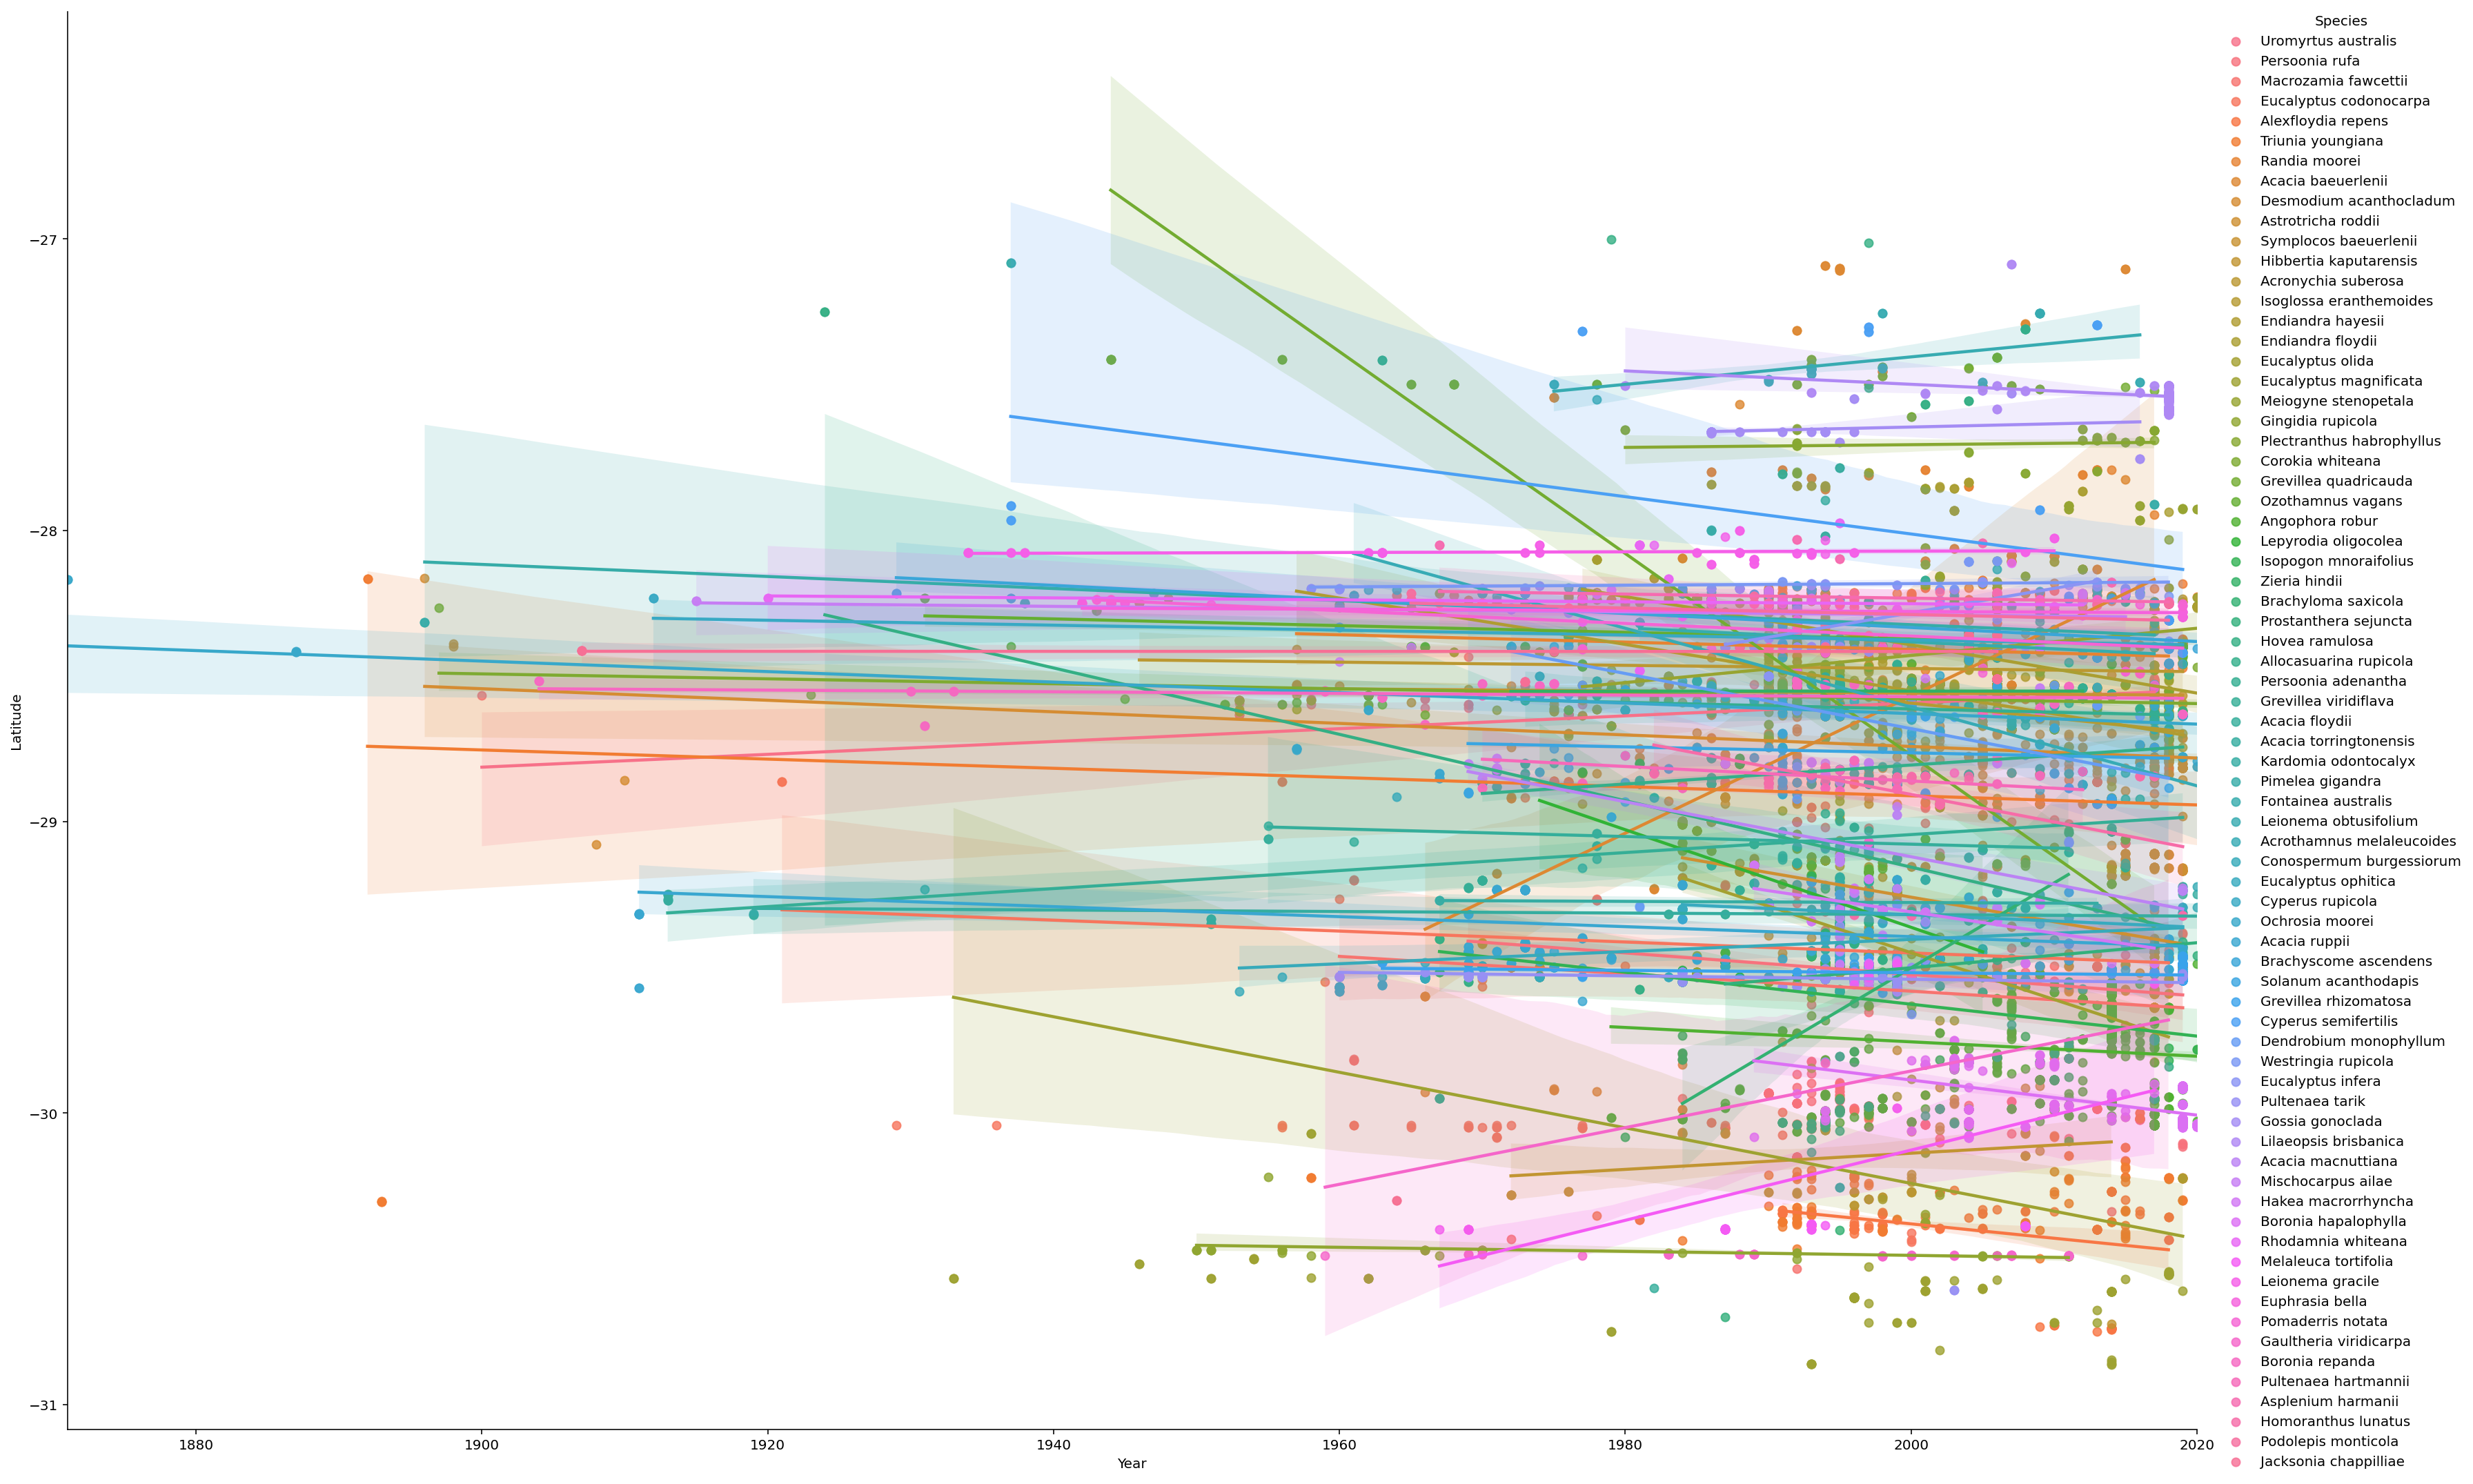

In [4]:
sns.lmplot(x="Year", y="Latitude", hue = "Species", data=data, height=15, aspect=1.5)

- holm-bonferroni
- are taller species less likely to change? ask questions about types of species that may be changing
- what families may be changing
- herbaceous vs woody
- canopy vs understorey
- write up hypotheses before writing up (or finding out about) results
- address limitations in methods not the discussion
- what clades of plants ar eparticularly likely to change
- plant height
- get rid of species with more than x years between records
- rainforest vs schlerophyll - vegetation map plantnet nsw
- set min year range for any individual species
- what kinds of species are moving and which are being left behind

In [127]:
gb = data.groupby('Species')    
databyspecies = [gb.get_group(x) for x in gb.groups]
databyspecies[0].head()

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count,lat_long_tuple,elevation
12,Acacia baeuerlenii,-29.176700,153.280300,200.0,1971.0,present,-27.081875,-30.200636,79,"(-29.1766999992, 153.2803)",41.272797
249,Acacia baeuerlenii,-29.497368,153.220613,1000.0,2011.0,present,-27.081875,-30.200636,79,"(-29.49736754, 153.220612517)",29.119694
290,Acacia baeuerlenii,-29.500000,153.250000,1000.0,1974.0,present,-27.081875,-30.200636,79,"(-29.5, 153.25)",8.030618
352,Acacia baeuerlenii,-29.498411,153.251075,1000.0,1974.0,present,-27.081875,-30.200636,79,"(-29.49841063, 153.251074653)",2.116632
482,Acacia baeuerlenii,-29.361253,153.076288,100.0,1997.0,present,-27.081875,-30.200636,79,"(-29.3612528, 153.07628835)",228.998825


In [130]:
# OLS regression results

names = []
p = []
coefs_intercept = []
coefs_year = []
for i in range(len(data['Species'].unique())):
    results = smf.ols('Latitude ~ Year + elevation', data=databyspecies[i]).fit()
    p.append(results.pvalues)
    coefs_intercept.append(results.params[0])
    coefs_year.append(results.params[1])
    names.append(databyspecies[i].Species.unique().item())
    print(databyspecies[i]['Species'].unique(), results.summary())

['Acacia baeuerlenii']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     15.98
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.61e-06
Time:                        09:56:30   Log-Likelihood:                -100.30
No. Observations:                  79   AIC:                             206.6
Df Residuals:                      76   BIC:                             213.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.2675     13.

['Astrotricha roddii']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     691.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.32e-135
Time:                        09:56:30   Log-Likelihood:                 344.12
No. Observations:                 433   AIC:                            -682.2
Df Residuals:                     430   BIC:                            -670.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.4792      1.

['Dendrobium monophyllum']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     6.319
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00427
Time:                        09:56:30   Log-Likelihood:                -13.862
No. Observations:                  41   AIC:                             33.72
Df Residuals:                      38   BIC:                             38.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.2736    

['Gingidia rupicola']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.794
Date:                Mon, 14 Sep 2020   Prob (F-statistic):              0.184
Time:                        09:56:31   Log-Likelihood:                 54.875
No. Observations:                  32   AIC:                            -103.8
Df Residuals:                      29   BIC:                            -99.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2539      1.1

['Leionema gracile']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     22.05
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.16e-07
Time:                        09:56:31   Log-Likelihood:                 144.31
No. Observations:                  55   AIC:                            -282.6
Df Residuals:                      52   BIC:                            -276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.7479      0.24

['Plectranthus habrophyllus']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     6.642
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00343
Time:                        09:56:31   Log-Likelihood:                 69.548
No. Observations:                  40   AIC:                            -133.1
Df Residuals:                      37   BIC:                            -128.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.2882 

['Randia moorei']                             OLS Regression Results                            
Dep. Variable:               Latitude   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     201.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           9.33e-64
Time:                        09:56:31   Log-Likelihood:                 248.25
No. Observations:                 468   AIC:                            -490.5
Df Residuals:                     465   BIC:                            -478.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5853      1.525  

In [131]:
# make params dataframe with species, p values at intercept and year, and coefs at intercept and year
params = pd.DataFrame(p)
params.insert(0, 'Species', names)
params['coefs_intercept'] = coefs_intercept
params['coefs_year'] = coefs_year

In [132]:
params

,Species,Intercept,Year,elevation,coefs_intercept,coefs_year
0,Acacia baeuerlenii,1.488307e-05,1.663338e-02,3.675235e-05,-62.267531,0.016597
1,Acacia floydii,4.807280e-07,5.385497e-01,4.718304e-08,-31.055195,0.001694
2,Acacia macnuttiana,5.265300e-03,1.488167e-07,8.292281e-02,-9.779395,-0.009791
3,Acacia ruppii,2.247978e-109,4.746969e-02,1.701125e-42,-31.057287,0.000782
4,Acacia torringtonensis,4.096788e-25,8.260838e-01,5.668530e-03,-30.081885,0.000232
...,...,...,...,...,...,...
67,Symplocos baeuerlenii,8.451063e-182,7.793930e-02,1.332192e-30,-27.550740,-0.000556
68,Triunia youngiana,2.543992e-09,3.982185e-01,4.037787e-01,-25.338339,-0.001760
69,Uromyrtus australis,4.363976e-62,9.859977e-01,4.475076e-13,-28.840498,-0.000012
70,Westringia rupicola,1.670337e-43,7.116502e-01,2.016973e-12,-28.178612,0.000053


# Attention Eve :)
# Get coefficients and p values for quantreg lines

In [136]:
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects.packages import importr, data

# import base r
r_base = importr('base') 

# import R's utility package
utils = importr('utils')

# select a mirror for R packages and package installation (run on first use)

# utils.chooseCRANmirror(ind=1) # select the first mirror in the list
# utils.install_packages('quantreg')

# import quantreg package
quantreg = importr('quantreg')

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

anova = quantreg.anova_rq
summ = quantreg.summary_rq
# p5 = []
# p95 = []
# coefs5 = []
# coefs95 = []
# coefs5_intercept = []
# coefs95_intercept = []

# ######################################################## SE choice here ###############################################################

# se='rank'

# ######################################################## SE choice here ###############################################################
# # nid 

# # for i in range(len(databyspecies)):
    
# species = databyspecies[0]

# with localconverter(ro.default_converter + pandas2ri.converter):
#     r_df = ro.conversion.py2rpy(species)

# model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
# model95 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.95)
# summ = quantreg.summary_rq
    
# print(summ(model5, se=se, iid=False)[2])
#     p5.append(summ(model5, se=se)[2][7])
#     p95.append(summ(model95, se=se)[2][7])
#     coefs5.append(summ(model5, se=se)[2][1])
#     coefs95.append(summ(model95, se=se)[2][1])
#     coefs5_intercept.append(summ(model5, se=se)[2][0])
#     coefs95_intercept.append(summ(model95, se=se)[2][0])

# params['p5'] = p5
# params['p95'] = p95
# params['coefs5'] = coefs5
# params['coefs95'] = coefs95
# params['coefs5_intercept'] = coefs5_intercept
# params['coefs95_intercept'] = coefs95_intercept

In [27]:
databyspecies[9]

,Species,Latitude,Longitude,Coordinate Uncertainty in Metres,Year,Occurrence status,maxlat,minlat,record_count
169,Allocasuarina rupicola,-28.870000,152.970000,1000.0,1993.0,present,-28.556877,-29.483333,104
446,Allocasuarina rupicola,-28.841321,151.988871,100.0,1994.0,present,-28.556877,-29.483333,104
515,Allocasuarina rupicola,-28.841189,151.989156,100.0,1994.0,present,-28.556877,-29.483333,104
650,Allocasuarina rupicola,-28.866700,152.166700,1000.0,1981.0,present,-28.556877,-29.483333,104
677,Allocasuarina rupicola,-28.866700,152.166700,1000.0,1981.0,present,-28.556877,-29.483333,104
...,...,...,...,...,...,...,...,...,...
12179,Allocasuarina rupicola,-28.635839,151.808868,10.0,2019.0,present,-28.556877,-29.483333,104
12217,Allocasuarina rupicola,-28.837307,152.154421,50.0,2004.0,present,-28.556877,-29.483333,104
12384,Allocasuarina rupicola,-28.842323,152.150431,100.0,1997.0,present,-28.556877,-29.483333,104
12563,Allocasuarina rupicola,-28.816700,152.166700,1000.0,1997.0,present,-28.556877,-29.483333,104


In [197]:
print(anova(model5, model95, se='ker')[0][2])

[1] 3.875546



TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [205]:
p_val_anova = []
coefs5_intercept = []
coefs95_intercept = []
coefs5 = []
coefs95 = []

for i in range(len(databyspecies)):
    species = databyspecies[i]

    # convert pandas dataframe to r dataframe - 'r_df'
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(species)

    # fit models
    model5 = quantreg.rq('Latitude ~ Year + elevation', data=r_df, tau = 0.05)
    model95 = quantreg.rq('Latitude ~ Year + elevation', data=r_df, tau = 0.95)
    
    coefs5_intercept.append(model5[0][0])
    coefs95_intercept.append(model95[0][0])
    coefs5.append(model5[0][1])
    coefs95.append(model95[0][1])

    T = anova(model5, model95, se='ker')[0][2][0]

    boot = 1000
    T_star = []

    for x in range(0, boot):

        # permutation
        random.shuffle(species.Latitude.values)
#         random.shuffle(species.elevation.values)
        
        with localconverter(ro.default_converter + pandas2ri.converter):
            r_df = ro.conversion.py2rpy(species)
            
        # fit models with quantreg
        model5 = quantreg.rq('Latitude ~ Year + elevation', data=r_df, tau = 0.05)
        model95 = quantreg.rq('Latitude ~ Year + elevation', data=r_df, tau = 0.95)

        # add to T_star (list of values)
        T_star.append(anova(model5, model95, se='ker')[0][2][0])

    p_val_anova.append((len(np.where(np.array(T_star)>T)[0])+1)/((len(T_star))+1))
    
    print(p_val_anova[i])

0.14585414585414586
0.9120879120879121
0.3876123876123876
0.2077922077922078
0.2677322677322677
0.9270729270729271
0.4925074925074925
0.16983016983016982
0.5234765234765235
0.6773226773226774
0.8931068931068931
0.8521478521478522
0.8261738261738262
0.6533466533466533
0.8671328671328671
0.37662337662337664
0.40559440559440557
0.8601398601398601
0.5594405594405595
0.3276723276723277
0.04395604395604396
0.01998001998001998
0.1028971028971029
0.000999000999000999
0.01098901098901099
0.000999000999000999
0.07492507492507493
0.000999000999000999
0.6193806193806194
0.006993006993006993
0.3176823176823177
0.002997002997002997
0.6013986013986014
0.1918081918081918
0.000999000999000999
0.26973026973026976
0.07292707292707293
0.11188811188811189
0.007992007992007992
0.000999000999000999
0.2597402597402597
0.000999000999000999
0.13986013986013987
0.000999000999000999
0.5754245754245755
0.000999000999000999
0.03796203796203796
0.000999000999000999
0.04595404595404595
0.000999000999000999
0.16583416

In [211]:
for item in p_val_anova:
    if item < 0.05:
        print(item)

0.04395604395604396
0.01998001998001998
0.000999000999000999
0.01098901098901099
0.000999000999000999
0.000999000999000999
0.006993006993006993
0.002997002997002997
0.000999000999000999
0.007992007992007992
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.000999000999000999
0.03796203796203796
0.000999000999000999
0.04595404595404595
0.000999000999000999
0.04395604395604396
0.04795204795204795
0.001998001998001998
0.015984015984015984
0.000999000999000999
0.029970029970029972
0.000999000999000999
0.007992007992007992
0.001998001998001998
0.014985014985014986


In [62]:
boot = 1000
p_qr = []
# coefs5 = []
# coefs95 = []
T_star = []

for i in range(len(databyspecies)):

for x in range(0, boot):
    
    # permutation
    random.shuffle(species.Latitude.values)
    
    # convert to r dataframe
    with localconverter(ro.default_converter + pandas2ri.converter):
        r_df = ro.conversion.py2rpy(species)
        
    # fit models with quantreg
    model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
    model95 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.95)
    
    # add to T_star (list of values)
    T_star.append(anova(model5, model95, se='ker')[0][3][0])

len(np.where(np.array(T_star)>T)[0])/boot

# p_qr.append(len(np.where(np.array(T_star)>T)[0])/boot)
# coefs5.append(summ(model5, se='rank')[2][0])
# coefs95.append(summ(model95, se='rank')[2][0])

0.0

In [115]:
# params['p_qr'] = p_qr
# params['coefs5'] = coefs5
# params['coefs95'] = coefs95

-45.75978170866604


In [68]:
# model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
# model5a = quantreg.rq('Latitude ~ 1', data=r_df, tau = 0.05)

# print(anova(model5, model5a, se='boot', iid=False)[0])

In [32]:
# model5 = quantreg.rq('Latitude ~ Year', data=r_df, tau = 0.05)
# model5a = quantreg.rq('Latitude ~ 1', data=r_df, tau = 0.05)

# print(anova(model5, model5a, test='rank')[0])

  ndf ddf       Tn     pvalue
1   1  77 3.420099 0.06824477



In [ ]:
params.head()

# Holm adjustment

In [11]:
from statsmodels.stats.multitest import multipletests

# for every species, apply holm bonferroni adjustment for p values from ols, p5 and p95
# add adjusted p values to dataframe 'params'

holm_adjust_ols = multipletests(params.Year, method='holm')[1]
# holm_adjust_5 = multipletests(params.p5, method='holm')[1]
# holm_adjust_95 = multipletests(params.p95, method='holm')[1]

params['holm_adjust_ols'] = holm_adjust_ols
# params['holm_adjust_5'] = holm_adjust_5
# params['holm_adjust_95'] = holm_adjust_95

# Attention Eve :)
# Significance of 5th and 95th percentile lines change after holm adjustment depending on which se is used

In [12]:
# 18 species significant after holm adjustment
holm_sig = params[params.holm_adjust_ols <0.05]
len(holm_sig)

18

In [12]:
# 5th percentile sig after holm adjust
holm_sig5 = params[params.holm_adjust_5 <0.05]
len(holm_sig5)

50

In [13]:
# 95th percentile sig after holm adjust
holm_sig95 = params[params.holm_adjust_95 <0.05]
len(holm_sig95)

45

In [14]:
# 38 species with significant movement before holm ajustment (out of 72)
sig = params[(params.Year<0.05)]
len(sig)

38

In [15]:
sig

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,holm_adjust_ols,holm_adjust_5,holm_adjust_95
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,5.674638e-02,9.015011e-14,-0.002738,0.022170,-24.544339,-71.329150,9.705316e-02,8.491352e-01,4.146905e-12
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,0.000000e+00,1.145373e-06,-0.023600,-0.000453,17.642000,-27.889496,2.514689e-05,0.000000e+00,4.352416e-05
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,0.000000e+00,5.104646e-01,0.000617,0.000358,-30.749917,-29.554552,6.721906e-02,0.000000e+00,1.000000e+00
6,Acrothamnus melaleucoides,7.847919e-01,5.645068e-05,-1.570530,-0.013518,3.329140e-08,0.000000e+00,-0.022115,-0.000396,15.144778,-27.414314,3.443492e-03,1.131907e-06,0.000000e+00
7,Alexfloydia repens,6.764177e-10,1.382541e-03,-20.510832,-0.004935,0.000000e+00,0.000000e+00,-0.018085,0.000154,5.656853,-30.579125,7.050961e-02,0.000000e+00,0.000000e+00
8,Allocasuarina rupicola,9.193732e-46,9.929864e-06,-35.315487,0.003255,1.163612e-03,1.309439e-03,0.000369,0.005186,-29.609472,-39.032197,6.255814e-04,2.792668e-02,3.666430e-02
9,Angophora robur,1.541504e-55,1.103120e-03,-24.821247,-0.002467,2.057319e-07,0.000000e+00,-0.000669,-0.005028,-28.691023,-19.427469,5.956846e-02,6.789152e-06,0.000000e+00
11,Astrotricha roddii,1.412668e-09,3.616456e-16,-12.382730,-0.008438,0.000000e+00,0.000000e+00,-0.002337,-0.023191,-24.923026,17.665658,2.531519e-14,0.000000e+00,0.000000e+00
12,Boronia hapalophylla,1.672026e-64,5.965630e-35,-17.838652,-0.006024,0.000000e+00,0.000000e+00,0.001158,-0.008482,-32.384336,-12.782128,4.295253e-33,0.000000e+00,0.000000e+00
14,Brachyloma saxicola,3.249219e-07,5.100012e-04,-87.712321,0.029106,2.995948e-01,1.005862e-13,0.001587,0.012598,-33.213474,-54.364994,2.856007e-02,1.000000e+00,4.526379e-12


In [16]:
# mean OLS coefs (degrees of lat) multiplied by 111000m (111km is 1 degree of lat) to get the amount in meters that 
# the average species on this list is moving. 
############### NOTE this includes species which are NOT SIGNIFICANTLY MOVING, see below for sig moving species ###########################

params.coefs_year.mean()*111000

-194.36635251758307

In [17]:
# these species are moving toward the equator

print(sig[sig.coefs_year > 0].Species)
print(len(sig[sig.coefs_year > 0].Species))
print('_____________________________________________________________________________________')
print('The above species are moving toward the equator at approximately ', sig[sig.coefs_year > 0].coefs_year.mean()*111000 , ' meters per year')

0         Acacia baeuerlenii
8     Allocasuarina rupicola
14       Brachyloma saxicola
25         Eucalyptus infera
36     Grevillea viridiflava
46     Leionema obtusifolium
50      Meiogyne stenopetala
51      Melaleuca tortifolia
69       Uromyrtus australis
Name: Species, dtype: object
9
_____________________________________________________________________________________
The above species are moving toward the equator at approximately  1122.2859950644913  meters per year


In [18]:
# these species are moving toward the south pole

print(sig[sig.coefs_year < 0].Species)
print(len(sig[sig.coefs_year < 0].Species))
print('_____________________________________________________________________________________')
print('The above species are moving toward the south pole at approximately ', abs(sig[sig.coefs_year < 0].coefs_year.mean()*111000) , ' meters per year')

2            Acacia macnuttiana
3                 Acacia ruppii
6     Acrothamnus melaleucoides
7            Alexfloydia repens
9               Angophora robur
11           Astrotricha roddii
12         Boronia hapalophylla
15        Brachyscome ascendens
17             Corokia whiteana
19         Cyperus semifertilis
20       Dendrobium monophyllum
21      Desmodium acanthocladum
22            Endiandra floydii
23            Endiandra hayesii
26       Eucalyptus magnificata
27             Eucalyptus olida
28          Eucalyptus ophitica
34        Grevillea quadricauda
35        Grevillea rhizomatosa
37          Hakea macrorrhyncha
39          Homoranthus lunatus
40               Hovea ramulosa
41      Isoglossa eranthemoides
42        Isopogon mnoraifolius
47         Lepyrodia oligocolea
48        Lilaeopsis brisbanica
53              Ochrosia moorei
54            Ozothamnus vagans
56               Persoonia rufa
Name: Species, dtype: object
29
________________________________________

In [19]:
params.head()

,Species,Intercept,Year,coefs_intercept,coefs_year,p5,p95,coefs5,coefs95,coefs5_intercept,coefs95_intercept,holm_adjust_ols,holm_adjust_5,holm_adjust_95
0,Acacia baeuerlenii,1.669236e-06,1.941063e-03,-75.614719,0.023523,0.056746,9.015011e-14,-0.002738,0.022170,-24.544339,-71.329150,0.097053,0.849135,4.146905e-12
1,Acacia floydii,4.407802e-04,7.132008e-01,-26.454829,-0.001311,0.000000,0.000000e+00,0.001625,-0.044168,-32.378700,59.717648,1.000000,0.000000,0.000000e+00
2,Acacia macnuttiana,3.774612e-03,3.868752e-07,-10.243217,-0.009438,0.000000,1.145373e-06,-0.023600,-0.000453,17.642000,-27.889496,0.000025,0.000000,4.352416e-05
3,Acacia ruppii,4.717432e-69,1.292674e-03,-25.963158,-0.001716,0.000000,5.104646e-01,0.000617,0.000358,-30.749917,-29.554552,0.067219,0.000000,1.000000e+00
4,Acacia torringtonensis,1.134598e-23,8.075658e-01,-28.793402,-0.000263,0.000000,1.144183e-01,-0.002527,0.005198,-24.540838,-39.219218,1.000000,0.000000,1.000000e+00


# Plots

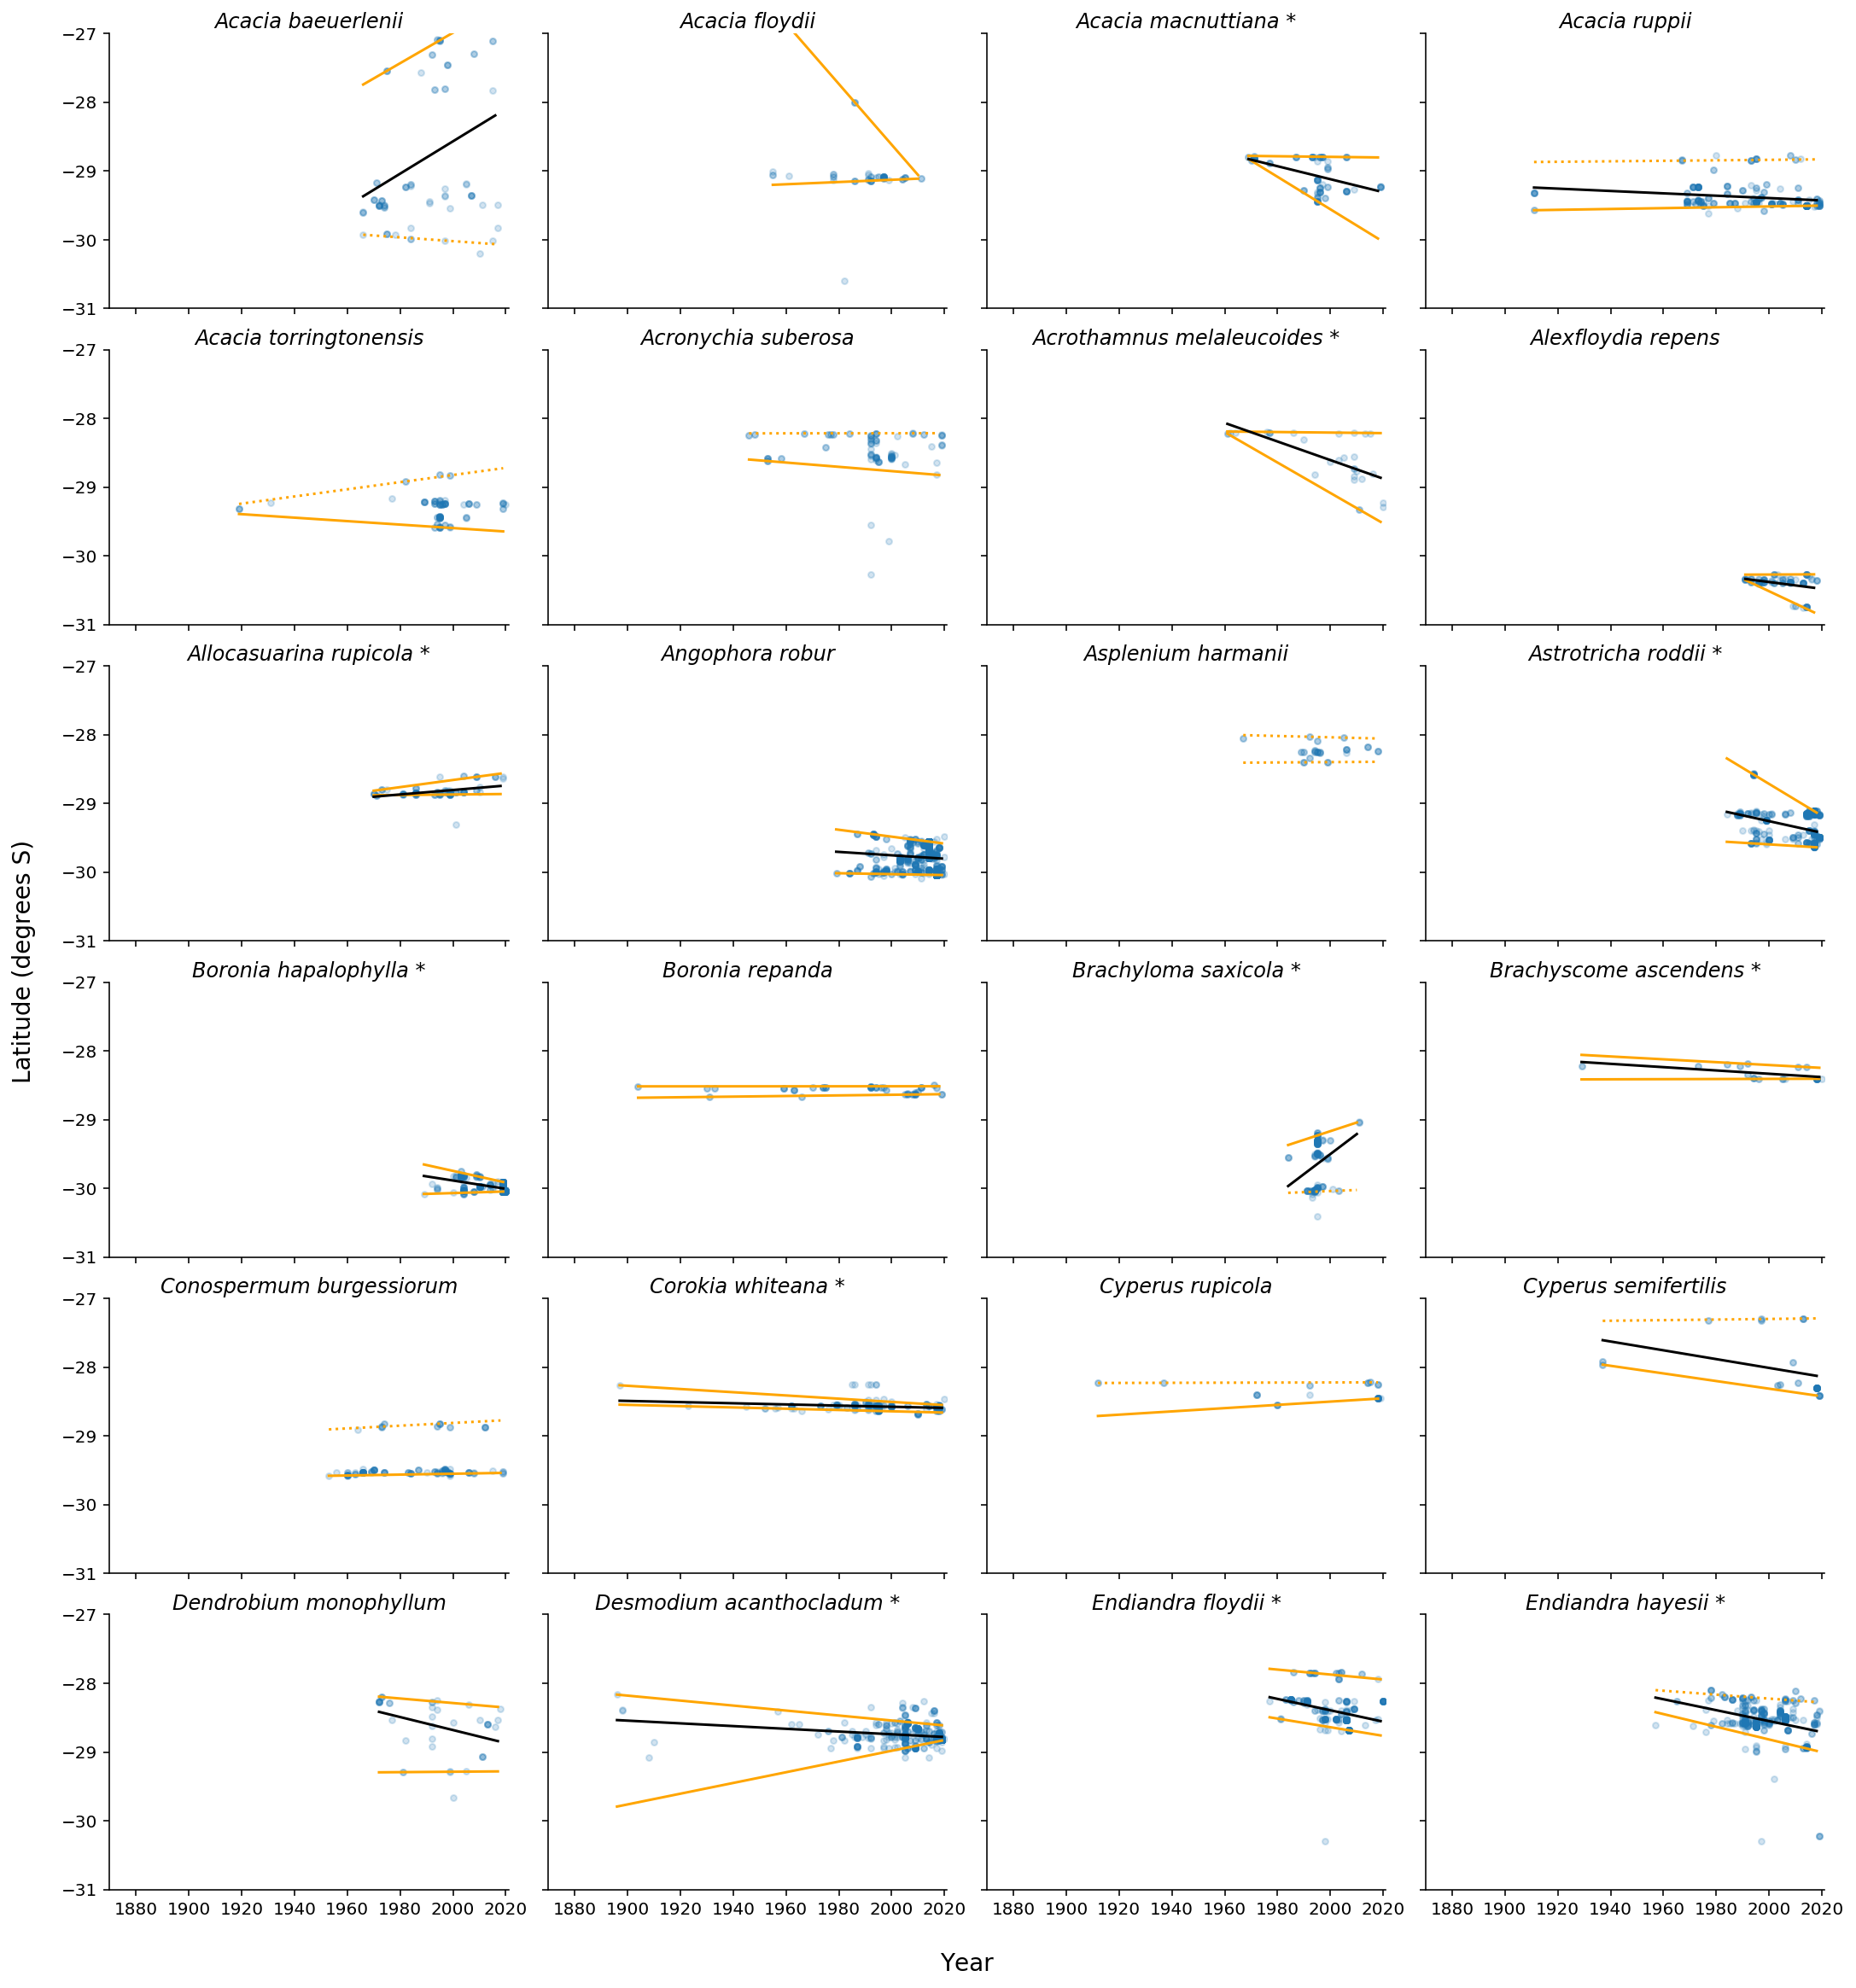

In [20]:
# makes big plot with subplots
fig, axes = plt.subplots(6,4, sharex=True, sharey=True, figsize=(18, 20))

plt.subplots_adjust(wspace=0.10, hspace=0.15)


# add invisible frame around big plot with axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Year", fontsize=14, labelpad=20)
plt.ylabel("Latitude (degrees S)", fontsize=14, labelpad=20)


# add smaller subplots by iteration
for i, ax in enumerate(axes.flatten(), start=0):
    
    try:
        species = databyspecies[i]
        
#         ax.xaxis.set_ticks(np.arange(1871, 2021, 30)
        
        # x and y axis number range
        ax.set_ylim([-31, -27])
        ax.set_xlim([1870, 2021])

        # remove the lines on the top and right sides of the subplots
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # makes axis numbers whole rather than decimal
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        
        # define x values (earliest year of occurence for species to latest, in steps of 1)
        x = np.arange(databyspecies[i].Year.min(), databyspecies[i].Year.max(), 1)
        
        # define function to produce y values (y=mx+b)
        def get_y(b,m):
            return m*x+b

        # 5th percentile line
        if params.holm_adjust_5[i]<0.05:
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, color='orange')

        else:
            y5 = get_y(params.coefs5_intercept[i], params.coefs5[i])
            ax.plot(x, y5, linestyle='dotted', color='orange')

        # 95th percentile line
        if params.holm_adjust_95[i]<0.05:
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, color='orange')

        else:
            y95 = get_y(params.coefs95_intercept[i], params.coefs95[i])
            ax.plot(x, y95, linestyle='dotted', color='orange')

        # OLS regression line   
        if params.Year[i]<0.05:
            y = get_y(params.coefs_intercept[i], params.coefs_year[i])
            ax.plot(x, y, color='black')

        # Scatterplot 
        ax.scatter(species.Year, species.Latitude, alpha = 0.2, s=12)

        # Title (species name)
        if params.holm_adjust_ols[i]<0.05:
            ax.set_title(' '.join(species.Species.unique() + ' *'), fontsize=12, pad=3, style='italic')
        else:
            ax.set_title(' '.join(species.Species.unique()), fontsize=12, pad=3, style='italic');
        
    except:
        pass


In [21]:
len(databyspecies)

72

In [22]:
# journal of biogeography
# annals of botany
# botanical journal of the malayan society
# global ecology and conservation

# get rid of lineson top of plots/move names down? *
# make dotted line non-significant quantiles and solid line significant quantiles *
# add * next to ones significant after holm adjustment *
# double check records are not from botanic gardens